In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BASE_PATH = '/kaggle/input/asvpoof-2019-dataset/LA/LA'

In [3]:
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)

In [4]:
train_df.head(5)

,0,1,2,3,4
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [5]:
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df.head(5)

,speaker_id,filename,system_id,class_name
0,LA_0079,LA_T_1138215,-,bonafide
1,LA_0079,LA_T_1271820,-,bonafide
2,LA_0079,LA_T_1272637,-,bonafide
3,LA_0079,LA_T_1276960,-,bonafide
4,LA_0079,LA_T_1341447,-,bonafide


In [6]:
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32')
print('len Train', len(train_df))
train_df.head(5)

len Train 25380


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0079,LA_T_1138215,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
1,LA_0079,LA_T_1271820,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
2,LA_0079,LA_T_1272637,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
3,LA_0079,LA_T_1276960,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
4,LA_0079,LA_T_1341447,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0


In [7]:
import os
import shutil

# Önceden oluşturulmuş klasörleri kontrol et ve gerekiyorsa oluştur
output_folder_0 = './0'  # Klasör adı 0
output_folder_1 = './1'  # Klasör adı 1

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

# Train veri çerçevesini dön ve dosyaları ilgili klasörlere kopyala
for index, row in train_df.iterrows():
    source_filepath = row['filepath']
    target_folder = f'./{row["target"]}'
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))

    # Hedef klasörü kontrol et ve gerekiyorsa oluştur
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Dosyayı hedef klasöre kopyala
    shutil.copy(source_filepath, target_filepath)

# İşlem tamamlandıktan sonra oluşturulan klasörleri kontrol etmek için kullanabilirsiniz
print(f'0 Klasöründe {len(os.listdir(output_folder_0))} dosya var.')
print(f'1 Klasöründe {len(os.listdir(output_folder_1))} dosya var.')


0 Klasöründe 2580 dosya var.
1 Klasöründe 22800 dosya var.


In [8]:
folder_path = './0' 

files = os.listdir(folder_path)

total_files = len(files)

print(f"Klasörde toplam {total_files} dosya var.")


Klasörde toplam 2580 dosya var.


In [9]:
import os


folder_path = './1'  # Değiştirmeniz gereken klasör yolu

files = os.listdir(folder_path)

total_files = len(files)

print(f"Klasörde toplam {total_files} dosya var.")


Klasörde toplam 22800 dosya var.


In [10]:
import random

folder_path = './0'  # Değiştirmeniz gereken klasör yolu

files = os.listdir(folder_path)

total_files = len(files)

# Silinecek dosya sayısı
num_files_to_delete = 1580

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
#         print(f"{file_name} dosyası silindi.")
    except Exception as e:
        print(f"Hata silinirken: {e}")

remaining_files = os.listdir(folder_path)
# print(f"Klasörde kalan toplam {len(remaining_files)} dosya var.")

In [11]:
import random

folder_path = './1' 

files = os.listdir(folder_path)

total_files = len(files)

# Silinecek dosya sayısı
num_files_to_delete = 21800

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    os.remove(file_path)

In [12]:
import os
import shutil

source_folders = ['0', '1']

# Hedef klasörün adı
target_folder = 'audio'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for source_folder in source_folders:
    source_folder_path = os.path.join('.', source_folder)
    target_folder_path = os.path.join(target_folder, source_folder)

    # Kaynak klasörü var mı diye kontrol et
    if os.path.exists(source_folder_path):
        # Hedef klasörü oluştur
        if not os.path.exists(target_folder_path):
            os.makedirs(target_folder_path)

        # Kaynak klasöründeki dosyaları hedef klasöre taşı
        for file_name in os.listdir(source_folder_path):
            source_file_path = os.path.join(source_folder_path, file_name)
            target_file_path = os.path.join(target_folder_path, file_name)
            shutil.move(source_file_path, target_file_path)

# print(f"İşlem tamamlandı. '{target_folder}' klasöründe şu dosyalar var:")
# print(os.listdir(target_folder))


In [13]:
DATASET_PATH = "/kaggle/working/audio"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [14]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        
        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):

                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # mfcc çıkar
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)

    #  MFCCs leri json olarak kaydet
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)




In [15]:
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1381
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1603
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=588
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=293
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=943
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: 

In [16]:


DATA_PATH = "/kaggle/working/data.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):

    
    X, y = load_data(DATA_PATH)

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):

    
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    
    prediction = model.predict(X)

    
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [17]:
if __name__ == "__main__":

    
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    
    
    input_shape = (130, 13, 1)
    model = build_model(input_shape)

    
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            verbose=1,
            patience=5,
            mode='min',
            restore_best_weights=True,
        )
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30,callbacks=[early_stopping],
)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                        

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       153
           1       0.91      0.91      0.91       158

    accuracy                           0.90       311
   macro avg       0.90      0.90      0.90       311
weighted avg       0.90      0.90      0.90       311

24/24 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9960


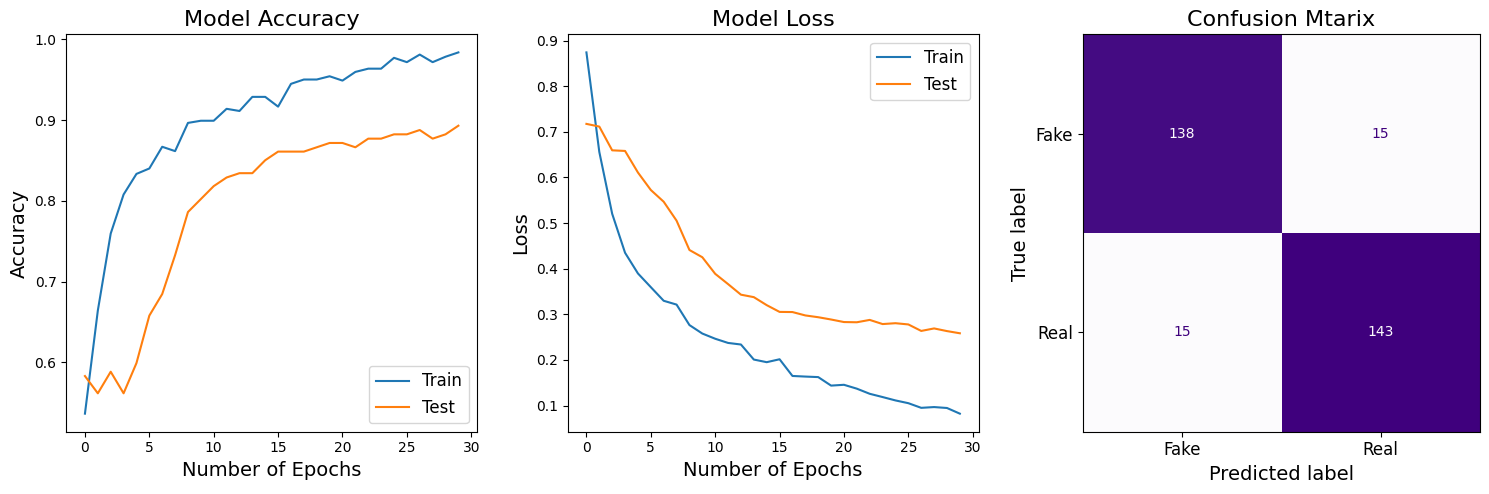

In [18]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for accuracy, loss, and confusion matrix

# Plot accuracy
axs[0].plot(history.history["accuracy"], label="Train")
axs[0].plot(history.history["val_accuracy"], label="Test")
axs[0].set_ylabel("Accuracy",fontsize=14)
axs[0].set_xlabel("Number of Epochs",fontsize=14)
axs[0].legend(loc="lower right",fontsize=12)
axs[0].set_title("Model Accuracy", fontsize=16)

# Plot loss
axs[1].plot(history.history["loss"], label="Train")
axs[1].plot(history.history["val_loss"], label="Test")
axs[1].set_ylabel("Loss", fontsize=14)
axs[1].set_xlabel("Number of Epochs",fontsize=14)
axs[1].legend(loc="upper right", fontsize=12)
axs[1].set_title("Model Loss", fontsize=16)

# Plot confusion matrix
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
loss = model.evaluate(X_train, y_train)
cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Fake', 'Real'])
disp.plot(ax=axs[2], cmap='Purples')
disp.ax_.set_title('Confusion Mtarix', fontsize=16, fontweight='medium')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('Predicted label', fontsize=14)
disp.ax_.set_ylabel('True label', fontsize=14)
disp.ax_.set_xticklabels(['Fake', 'Real'], fontsize=12)
disp.ax_.set_yticklabels(['Fake', 'Real'], fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [19]:
# Modeli kaydet
model.save("/kaggle/working/cnn_audio.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [21]:
def predict_voice(model, audio_file_path, genre_mapping):

    
    signal, sample_rate = librosa.load(audio_file_path, sr=22050)

    
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T

    # MFCC'leri uygun boyuta getir
    mfcc = np.resize(mfcc, (130, 13, 1))

    # Reshape MFCC'leri uygun boyuta gwtir
    mfcc = mfcc[np.newaxis, ...]

   
    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction, axis=1)

    
    genre_label = genre_mapping[predicted_index[0]]
    print("Raw prediction:", prediction)

    return genre_label


model_path = "/kaggle/input/audio-for-lstm/cnn_audio.h5"
model = load_model(model_path)


audio_file_path = "/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_train/flac/LA_T_1272637.flac"

genre_mapping = {0: "spoof", 1: "bonafide"}


predicted_voice = predict_voice(model, audio_file_path, genre_mapping)

print("Predicted label:", predicted_voice)


1/1 [==============================] - 0s 226ms/step
Raw prediction: [[0.00517772 0.99482226]]
Predicted label: bonafide
